The problem I am addressing is try to create a model to predict the median house value. I have selected to use the linear regression model.

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
I droped the first three columns because this data is not relevant to the problem. 

In [40]:
df.drop(['Unnamed: 0', 'longitude', 'latitude'], axis = 1, inplace = True)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Identifying the features and the target variable.

In [41]:
features_names = df.columns.to_list()[:-1]
X = df[features_names]
Y = df['median_house_value']

Preparing test and train data.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Fitting model to train data.

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

Testing and evaluating the model.

In [46]:
pred = my_linear_regression.predict(X_test)
pred

array([227316.10588181,  89722.00443954, 136167.84525748, ...,
       236125.29919533, 118098.81837419, 278017.47696692])

In [47]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.569834167201657


The score is kind of low, so I'm going to try to normalize the data and remove data that has a lesser effect on r2.

In [48]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The Coefficient (b_{}) is {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  -45799.271428052714
The Coefficient (b_1) is 1897.7241419112584
The Coefficient (b_2) is -19.20270820846349
The Coefficient (b_3) is 97.09719040545679
The Coefficient (b_4) is -39.21105968428648
The Coefficient (b_5) is 135.88725138188408
The Coefficient (b_6) is 47664.18901800082


In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")

Mean Absolute Error: 55506.64781967201
Mean Squared Error: 5805902606.1363
Root Mean Squared Error: 76196.47371195271
MAPE: 33.777487339599325 %


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [51]:
df_norm.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.509804,0.102359,0.102421,0.042994,0.099490,0.421277,0.679793
1,0.823529,0.039752,0.047952,0.022590,0.045387,0.213728,0.332990
2,0.509804,0.094556,0.078523,0.041509,0.081237,0.365064,0.526804
3,0.529412,0.001713,0.002173,0.001289,0.001644,0.388684,0.649484
4,0.352941,0.032661,0.037709,0.023739,0.038809,0.168108,0.137527


In [52]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features_names] 
Y = df_norm['median_house_value'] 
my_linear_regression.fit(X, Y)

LinearRegression()

In [53]:
summary = pd.DataFrame({'Features':features_names, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,housing_median_age,0.198018
1,total_rooms,-1.558805
2,total_bedrooms,1.353002
3,population,-2.575872
4,households,1.558537
5,median_income,1.431192


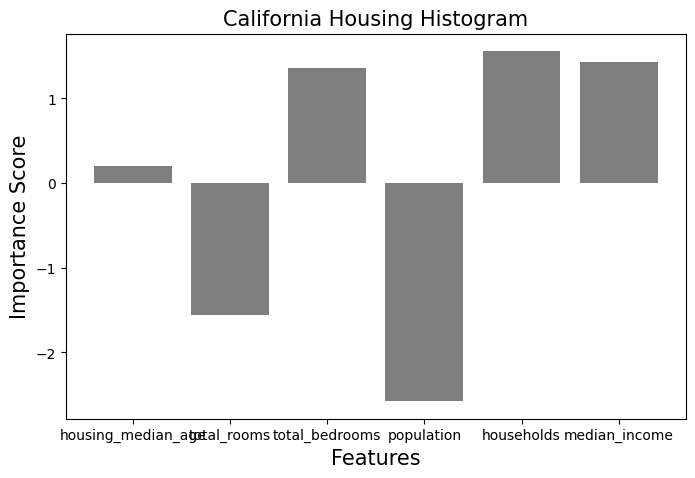

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:gray') 
plt.title('California Housing Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()

Identify that Housing median age and population seem to have low impact on the model.

In [55]:
df.drop(['housing_median_age', 'population'], axis = 1, inplace = True)
df.head()

,total_rooms,total_bedrooms,households,median_income,median_house_value
0,3885.0,661.0,606.0,6.6085,344700.0
1,1510.0,310.0,277.0,3.5990,176500.0
2,3589.0,507.0,495.0,5.7934,270500.0
3,67.0,15.0,11.0,6.1359,330000.0
4,1241.0,244.0,237.0,2.9375,81700.0


In [56]:
features_names = df.columns.to_list()[:-1]
X = df[features_names]
Y = df['median_house_value']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [58]:
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [59]:
pred = my_linear_regression.predict(X_test)
pred

array([205837.17279012,  80548.10492065, 142821.57275927, ...,
       236940.29525787, 145361.23149007, 255809.63255666])

In [60]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.5099551003552489


Our score went down after removing hosing median age and population, so I would continue to use the first model. If we want to increase our prediction accuracy more data is needed.